In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
#%matplotlib notebook

In [2]:
tau = 1.0           # time left to maturity (T-t) 
vol = 0.08       # volatility
s = 100           # asset current price
K = 100          # strike
r = 0.0            # short rate

In [3]:
d1 = 1/(vol*np.sqrt(tau))*(np.log(s/K) + (r+0.50*vol*vol)*tau)
print(d1)
print(stats.norm.pdf(d1,0,1))

0.04
0.398623254205


In [4]:
vega = s*stats.norm.pdf(d1,0,1)*np.sqrt(tau)
print(vega)

39.8623254205


In [5]:
def vega(tau,vol,s,K,r):
    d1 = 1/(vol*np.sqrt(tau))*(np.log(s/K) + (r+0.50*vol*vol)*tau)
    return s*stats.norm.pdf(d1,0,1)*np.sqrt(tau)

def vegaVarSwap(tau,vol,s,K,r):
    d1 = 1/(vol*np.sqrt(tau))*(np.log(s/K) + (r+0.50*vol*vol)*tau)
    vegaBS = s*stats.norm.pdf(d1,0,1)*np.sqrt(tau)
    return 1/(K*K)*vegaBS

In [6]:
print(vega(tau,vol,s,K,r))
print(vegaVarSwap(tau,vol,s,K,r))

39.8623254205
0.00398623254205


In [7]:
s = np.arange(0.1,200,1)
K = np.arange(0.1,200,1)
s_grid,K_grid= np.meshgrid(s, K)
V = vega(tau,vol,s_grid, K_grid,r)

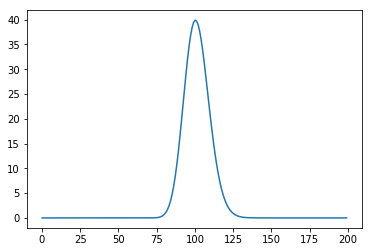

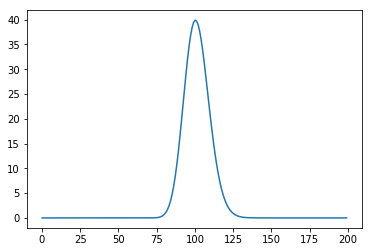

In [8]:
vegaS = vega(tau,vol,s,100,r)
vegaK = vega(tau,vol,100, K,r)

plt.plot(s,vegaS)
plt.show()
plt.plot(K, vegaK)
plt.show()

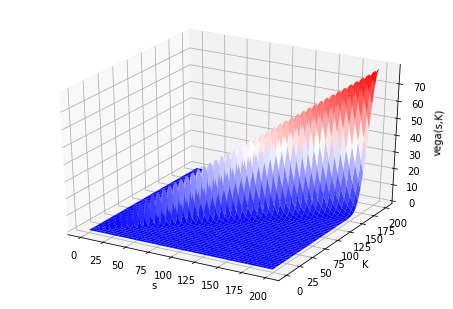

In [9]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(s_grid, K_grid, V,cmap='bwr')
ax.set_xlabel("s")
ax.set_ylabel("K")
ax.set_zlabel("vega(s,K)")
plt.show()

# Variance Swap Vega

In [10]:
s = np.arange(1,200,1)
K = np.arange(1,200,1)
s_grid,K_grid= np.meshgrid(s, K)
VV = vegaVarSwap(tau,vol,s_grid, K_grid,r)

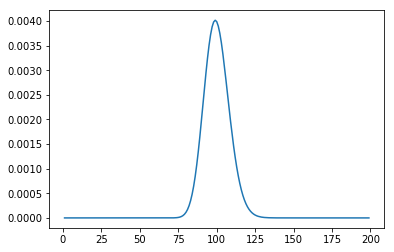

In [11]:
vegaVarK = vegaVarSwap(tau,vol,100,K,r)
plt.plot(s,vegaVarK)
plt.show()

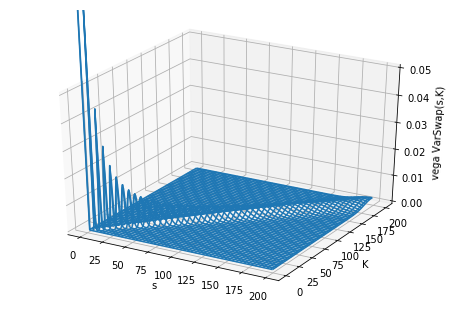

In [13]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(s_grid, K_grid, VV)
ax.set_xlabel("s")
ax.set_ylabel("K")
ax.set_zlabel("vega VarSwap(s,K)")
ax.set_zlim(0,0.050)
plt.show()